# Imports

In [1]:
# Base imports
import os

# Mathematical imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import shift

# Environment
import gym
import gym_env

# Stable baselines - RL algorithms
from stable_baselines3 import TD3, A2C, DDPG, SAC, PPO, HerReplayBuffer
from stable_baselines3.common.logger import configure
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.env_checker import check_env
from stable_baselines3.common.results_plotter import load_results, ts2xy, plot_results
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common import results_plotter

# ML imports
from torch.nn import functional as F
import torch as th
from sklearn import preprocessing

# nbimporter used to import from another file
import nbimporter
from lib import *

# Matplotlib setup
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

# Setting const variables

In [2]:
# Algorithms
algorithms = {
    "td3" : TD3,
    "a2c" : A2C,
    "ddpg" : DDPG,
    "sac" : SAC,
    "ppo" : PPO,
}

# Directory for training logs
log_dir = "tmp/"

# Reading data from csv

In [10]:
# Thermal data
df = pd.read_csv('../../data/thm/processed_thermal_data.csv')

# EPS data
#df = pd.read_csv('../../data/eps/processed_test_power_measurements_2.csv')

# User settings
- episode_length is the max number of steps that the agent can correlate
- obs_size is the number of time steps that the agent observes
- train_timesteps is the number of time steps that training is going for

In [22]:
# Choosing the parameter or multiple parameters (not yet implemented)
columns = ["B1_temp"]

# Choosing appropriate algorithm
algorithm_name = "ddpg"
algorithm = algorithms[algorithm_name]

# Training parameters
episode_length = 100
obs_size = 1
train_timesteps = 100000

# Preprocessing the data based on chosen columns

In [ ]:
data = df[columns].values
if len(columns) ==1:
    data = data.reshape((data.shape[0],))

# Environment setup

In [ ]:
env = gym.make("Anomaly-v4", data=data, episode_length=episode_length, obs_size=obs_size)
env = Monitor(env, log_dir)
env.reset(force=True)

# Check if environment is setup properly

In [ ]:
print(check_env(env))

# Model setup

Num timesteps: 1000
Best mean reward: -inf - Last mean reward per episode: -33.03
Saving new best model to tmp/best_models/ddpg_models/B1_sigmoid/OBS_1/EL_100/
Num timesteps: 2000
Best mean reward: -33.03 - Last mean reward per episode: 11.41
Saving new best model to tmp/best_models/ddpg_models/B1_sigmoid/OBS_1/EL_100/
Num timesteps: 3000
Best mean reward: 11.41 - Last mean reward per episode: -12.26
Num timesteps: 4000
Best mean reward: 11.41 - Last mean reward per episode: 1.37
Num timesteps: 5000
Best mean reward: 11.41 - Last mean reward per episode: 13.51
Saving new best model to tmp/best_models/ddpg_models/B1_sigmoid/OBS_1/EL_100/
Num timesteps: 6000
Best mean reward: 13.51 - Last mean reward per episode: 19.22
Saving new best model to tmp/best_models/ddpg_models/B1_sigmoid/OBS_1/EL_100/
Num timesteps: 7000
Best mean reward: 19.22 - Last mean reward per episode: 24.23
Saving new best model to tmp/best_models/ddpg_models/B1_sigmoid/OBS_1/EL_100/
Num timesteps: 8000
Best mean rewar

Num timesteps: 82000
Best mean reward: 76.05 - Last mean reward per episode: 64.13
Num timesteps: 83000
Best mean reward: 76.05 - Last mean reward per episode: 63.01
Num timesteps: 84000
Best mean reward: 76.05 - Last mean reward per episode: 63.62
Num timesteps: 85000
Best mean reward: 76.05 - Last mean reward per episode: 65.45
Num timesteps: 86000
Best mean reward: 76.05 - Last mean reward per episode: 65.26
Num timesteps: 87000
Best mean reward: 76.05 - Last mean reward per episode: 62.71
Num timesteps: 88000
Best mean reward: 76.05 - Last mean reward per episode: 65.06
Num timesteps: 89000
Best mean reward: 76.05 - Last mean reward per episode: 66.08
Num timesteps: 90000
Best mean reward: 76.05 - Last mean reward per episode: 66.68
Num timesteps: 91000
Best mean reward: 76.05 - Last mean reward per episode: 66.32
Num timesteps: 92000
Best mean reward: 76.05 - Last mean reward per episode: 66.64
Num timesteps: 93000
Best mean reward: 76.05 - Last mean reward per episode: 68.89
Num 

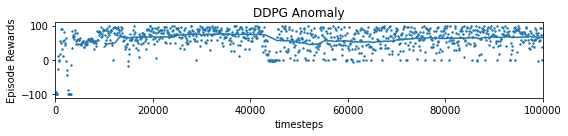

In [24]:
model = algorithm('MlpPolicy', env, device="cuda")

# Learning

In [ ]:
callback = SaveOnBestTrainingRewardCallback(check_freq=1000, 
                                            log_dir=log_dir, 
                                            algorithm=algorithm_name, 
                                            column = columns[0],
                                            obs_size = obs_size,
                                            ep_length = episode_length)

model.learn(total_timesteps=train_timesteps, callback=callback)

# Plotting the results

In [ ]:
plot_results([log_dir], train_timesteps, results_plotter.X_TIMESTEPS, f"{algorithm_name.upper()} Anomaly")
plt.show()